In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import warnings
warnings.filterwarnings('ignore')
pd.options.plotting.backend = "plotly"

import plotly.io as pio
pio.templates.default = "none"

plt.style.use('default')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (16, 4)
plt.rcParams['figure.dpi'] = 150

In [11]:
df_p1d1 = pd.read_csv('CELL21_WBR431_31K_BY_P1D1.csv', header=0)
crop_results = pd.read_csv('start_results_nov6.csv', header=0)
labels = pd.read_excel('CELL21_WBR431_31K_BY_P1D1_Label.xlsx', sheet_name='工作表1')
labels.head()

,Program,Group,Wire,Location,1st Bond Mode,First Speed,SBD Threshold,XY Limit,SBD Function,SBD Mode,...,Time,Force,USG Ramp Up,Force Ramp,Z- Distance,XY- Distance,Scrub Cycles,Scrub Amplitude,Scrub Frequency,Scrub Phase
0,UMT2345OST02,2,1,P2F,P4M4,80,0,0,On,A,...,1,78,0,0,75,-2,2,2.2,581,Perp
1,UMT2345OST02,2,2,P2F,P4M4,80,0,0,On,A,...,1,78,0,0,75,-2,2,2.2,581,Perp
2,UMT2345OST02,8,3,P2F,P4M4,80,0,0,On,A,...,1,78,0,0,75,-2,2,2.2,581,Perp
3,UMT2345OST02,1,4,P2F,P4M4,80,0,0,On,A,...,1,78,0,0,75,-2,2,2.2,581,Perp
4,UMT2345OST02,3,5,F2L,ProBond-FFF,50,0,0,On,A,...,1,82,0,0,75,-2,2,2.4,581,Perp


In [12]:
crop_results.head()

,wire num,1st bond start,1st bond end,looping start,looping end,2nd bond start,2nd bond end,reset motion start,reset motion end
0,wire 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wire 1,NaN,NaN,NaN,NaN,NaN,NaN,117001.0,118001.0
2,wire 2,118001.0,120001.0,NaN,NaN,NaN,NaN,NaN,NaN
3,wire 3,124501.0,126001.0,NaN,NaN,NaN,NaN,NaN,NaN
4,wire 4,131001.0,132501.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test_samples_start = crop_results.iloc[16: 26][['1st bond start', '1st bond end']].astype(int)

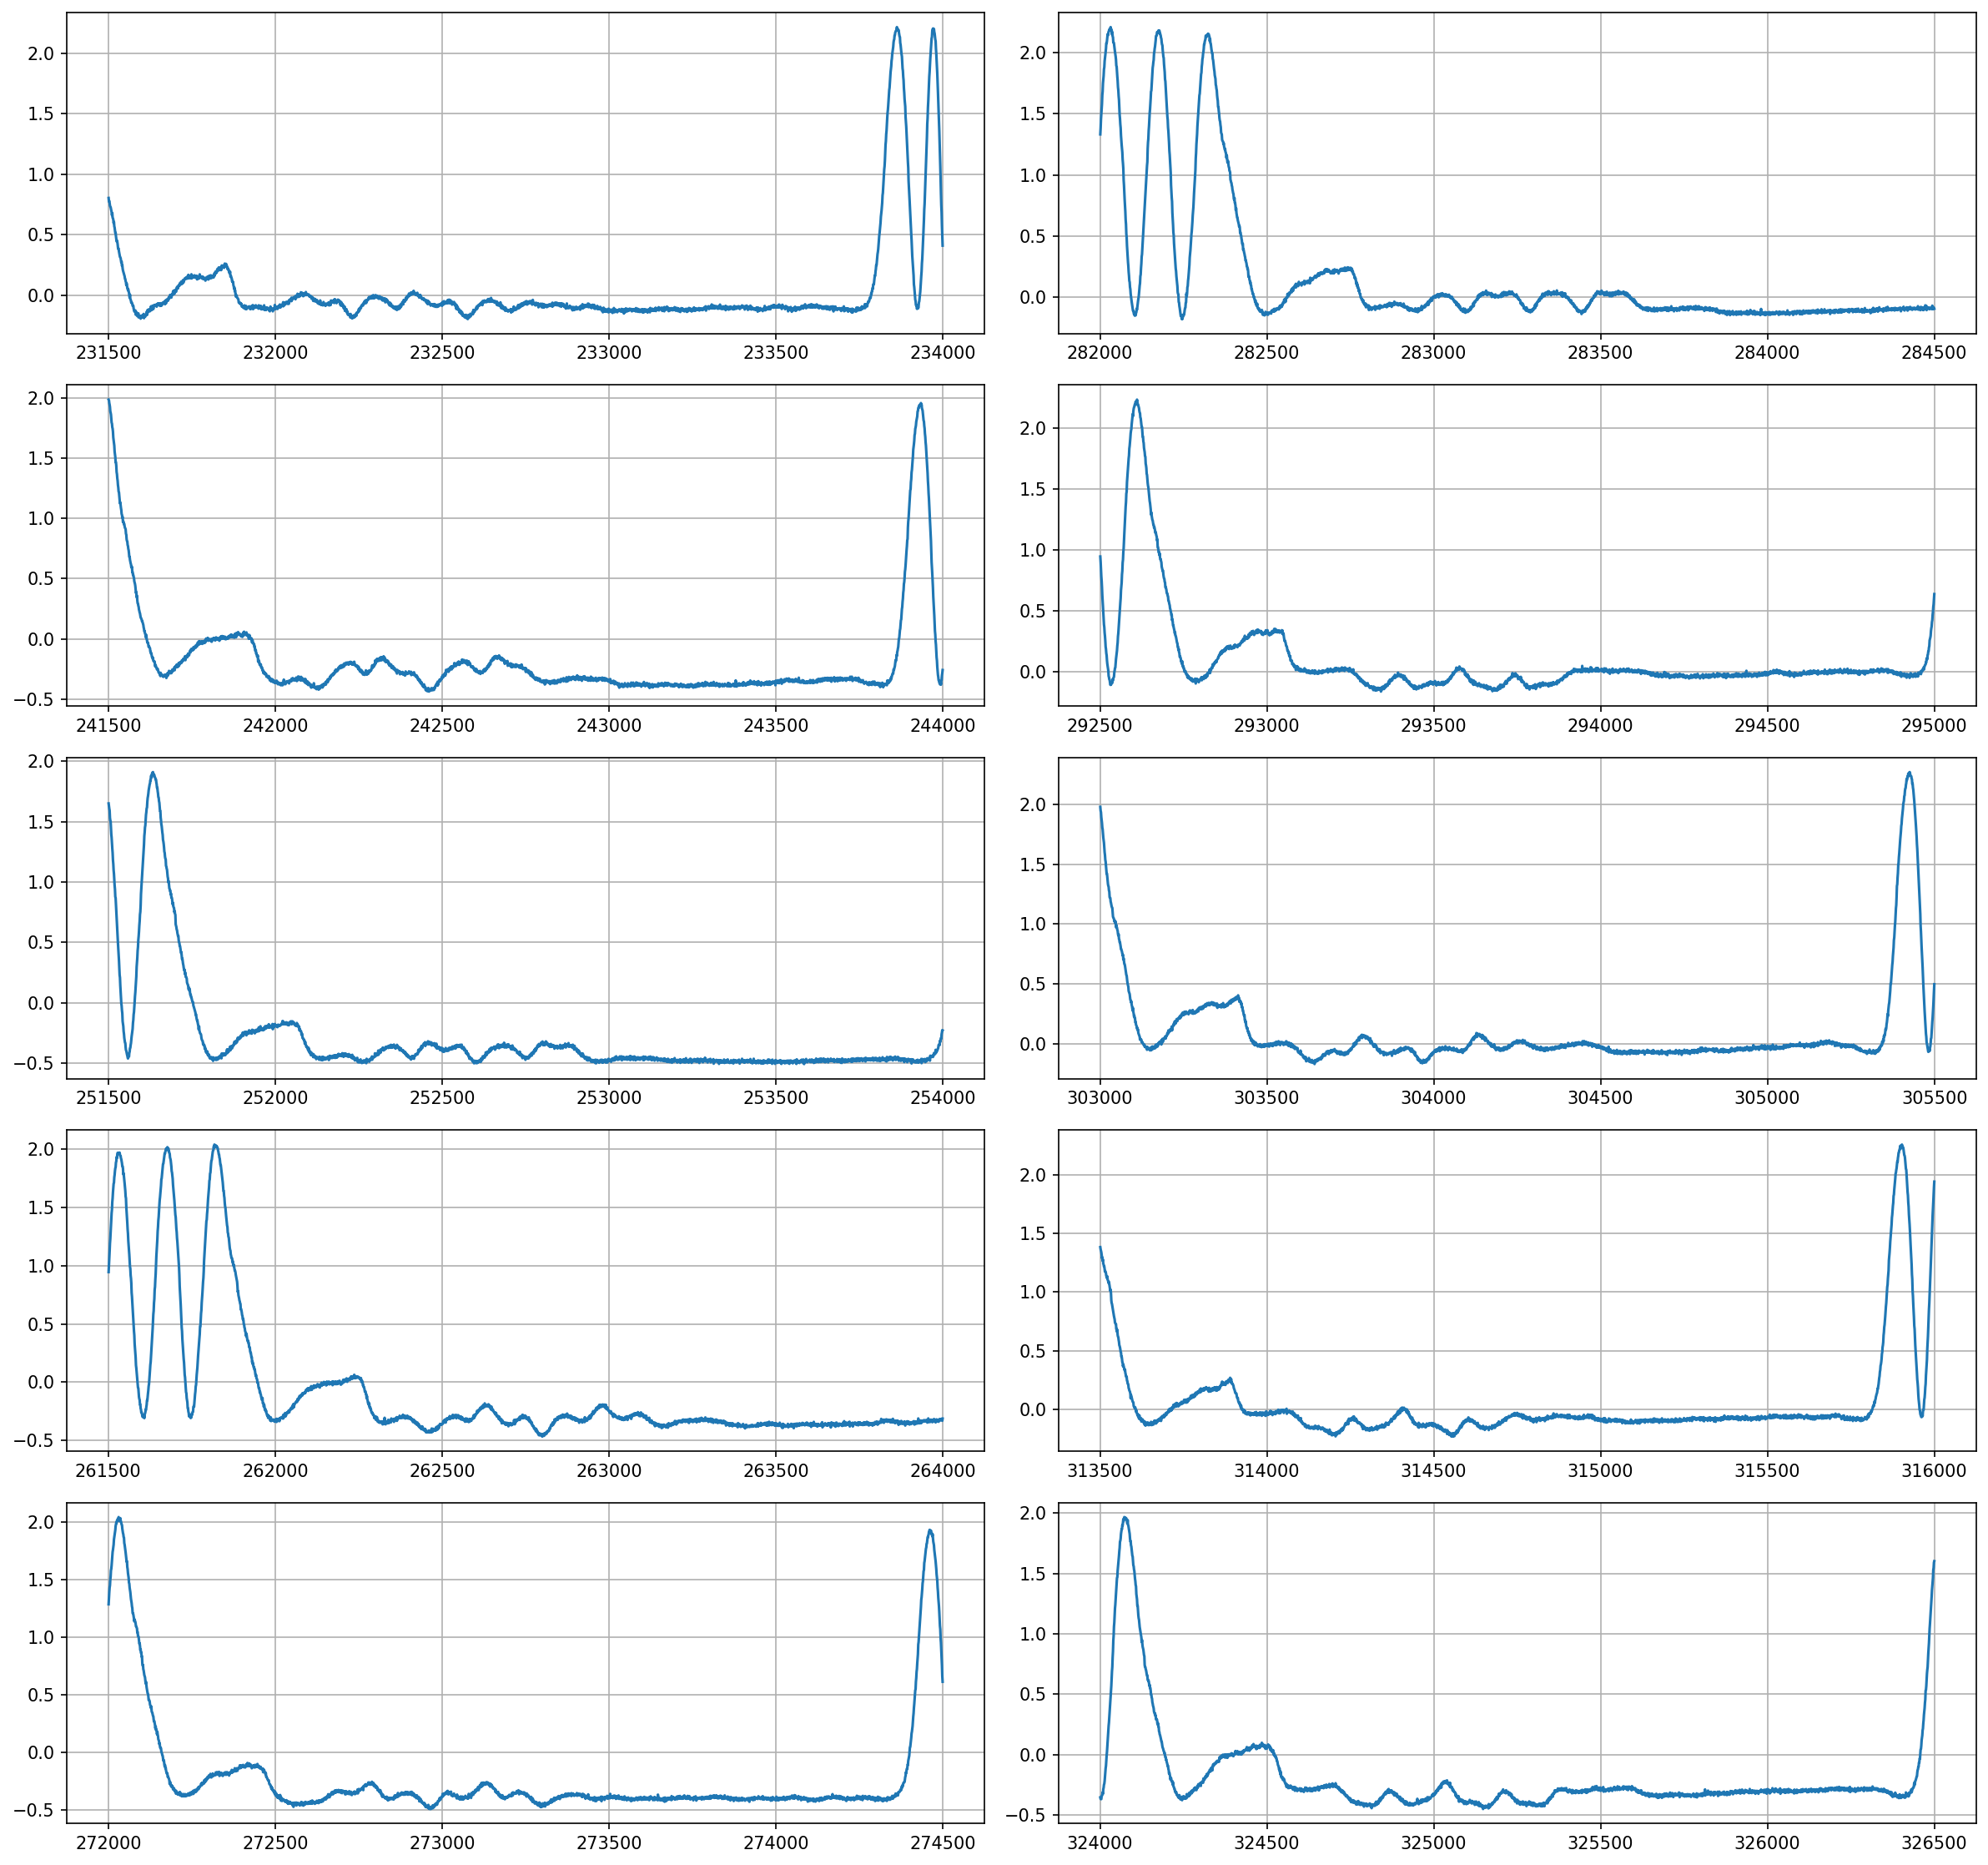

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 15))
for i in range(5):
    ax[i, 0].plot(df_p1d1['Z'][test_samples_start.iloc[i]['1st bond start']: test_samples_start.iloc[i]['1st bond end']])
    ax[i, 1].plot(df_p1d1['Z'][test_samples_start.iloc[i+5]['1st bond start']: test_samples_start.iloc[i+5]['1st bond end']])

plt.tight_layout()
plt.show()

In [20]:
for i in range(10):
    print(np.mean(df_p1d1['Z'][test_samples_start.iloc[i]['1st bond start']: test_samples_start.iloc[i]['1st bond end']]))

0.042423668
-0.17410342
-0.299197904
-0.075819876
-0.20448086
0.15839583200000007
0.09092194399999999
0.10530926400000001
0.045223299999999994
-0.18044116


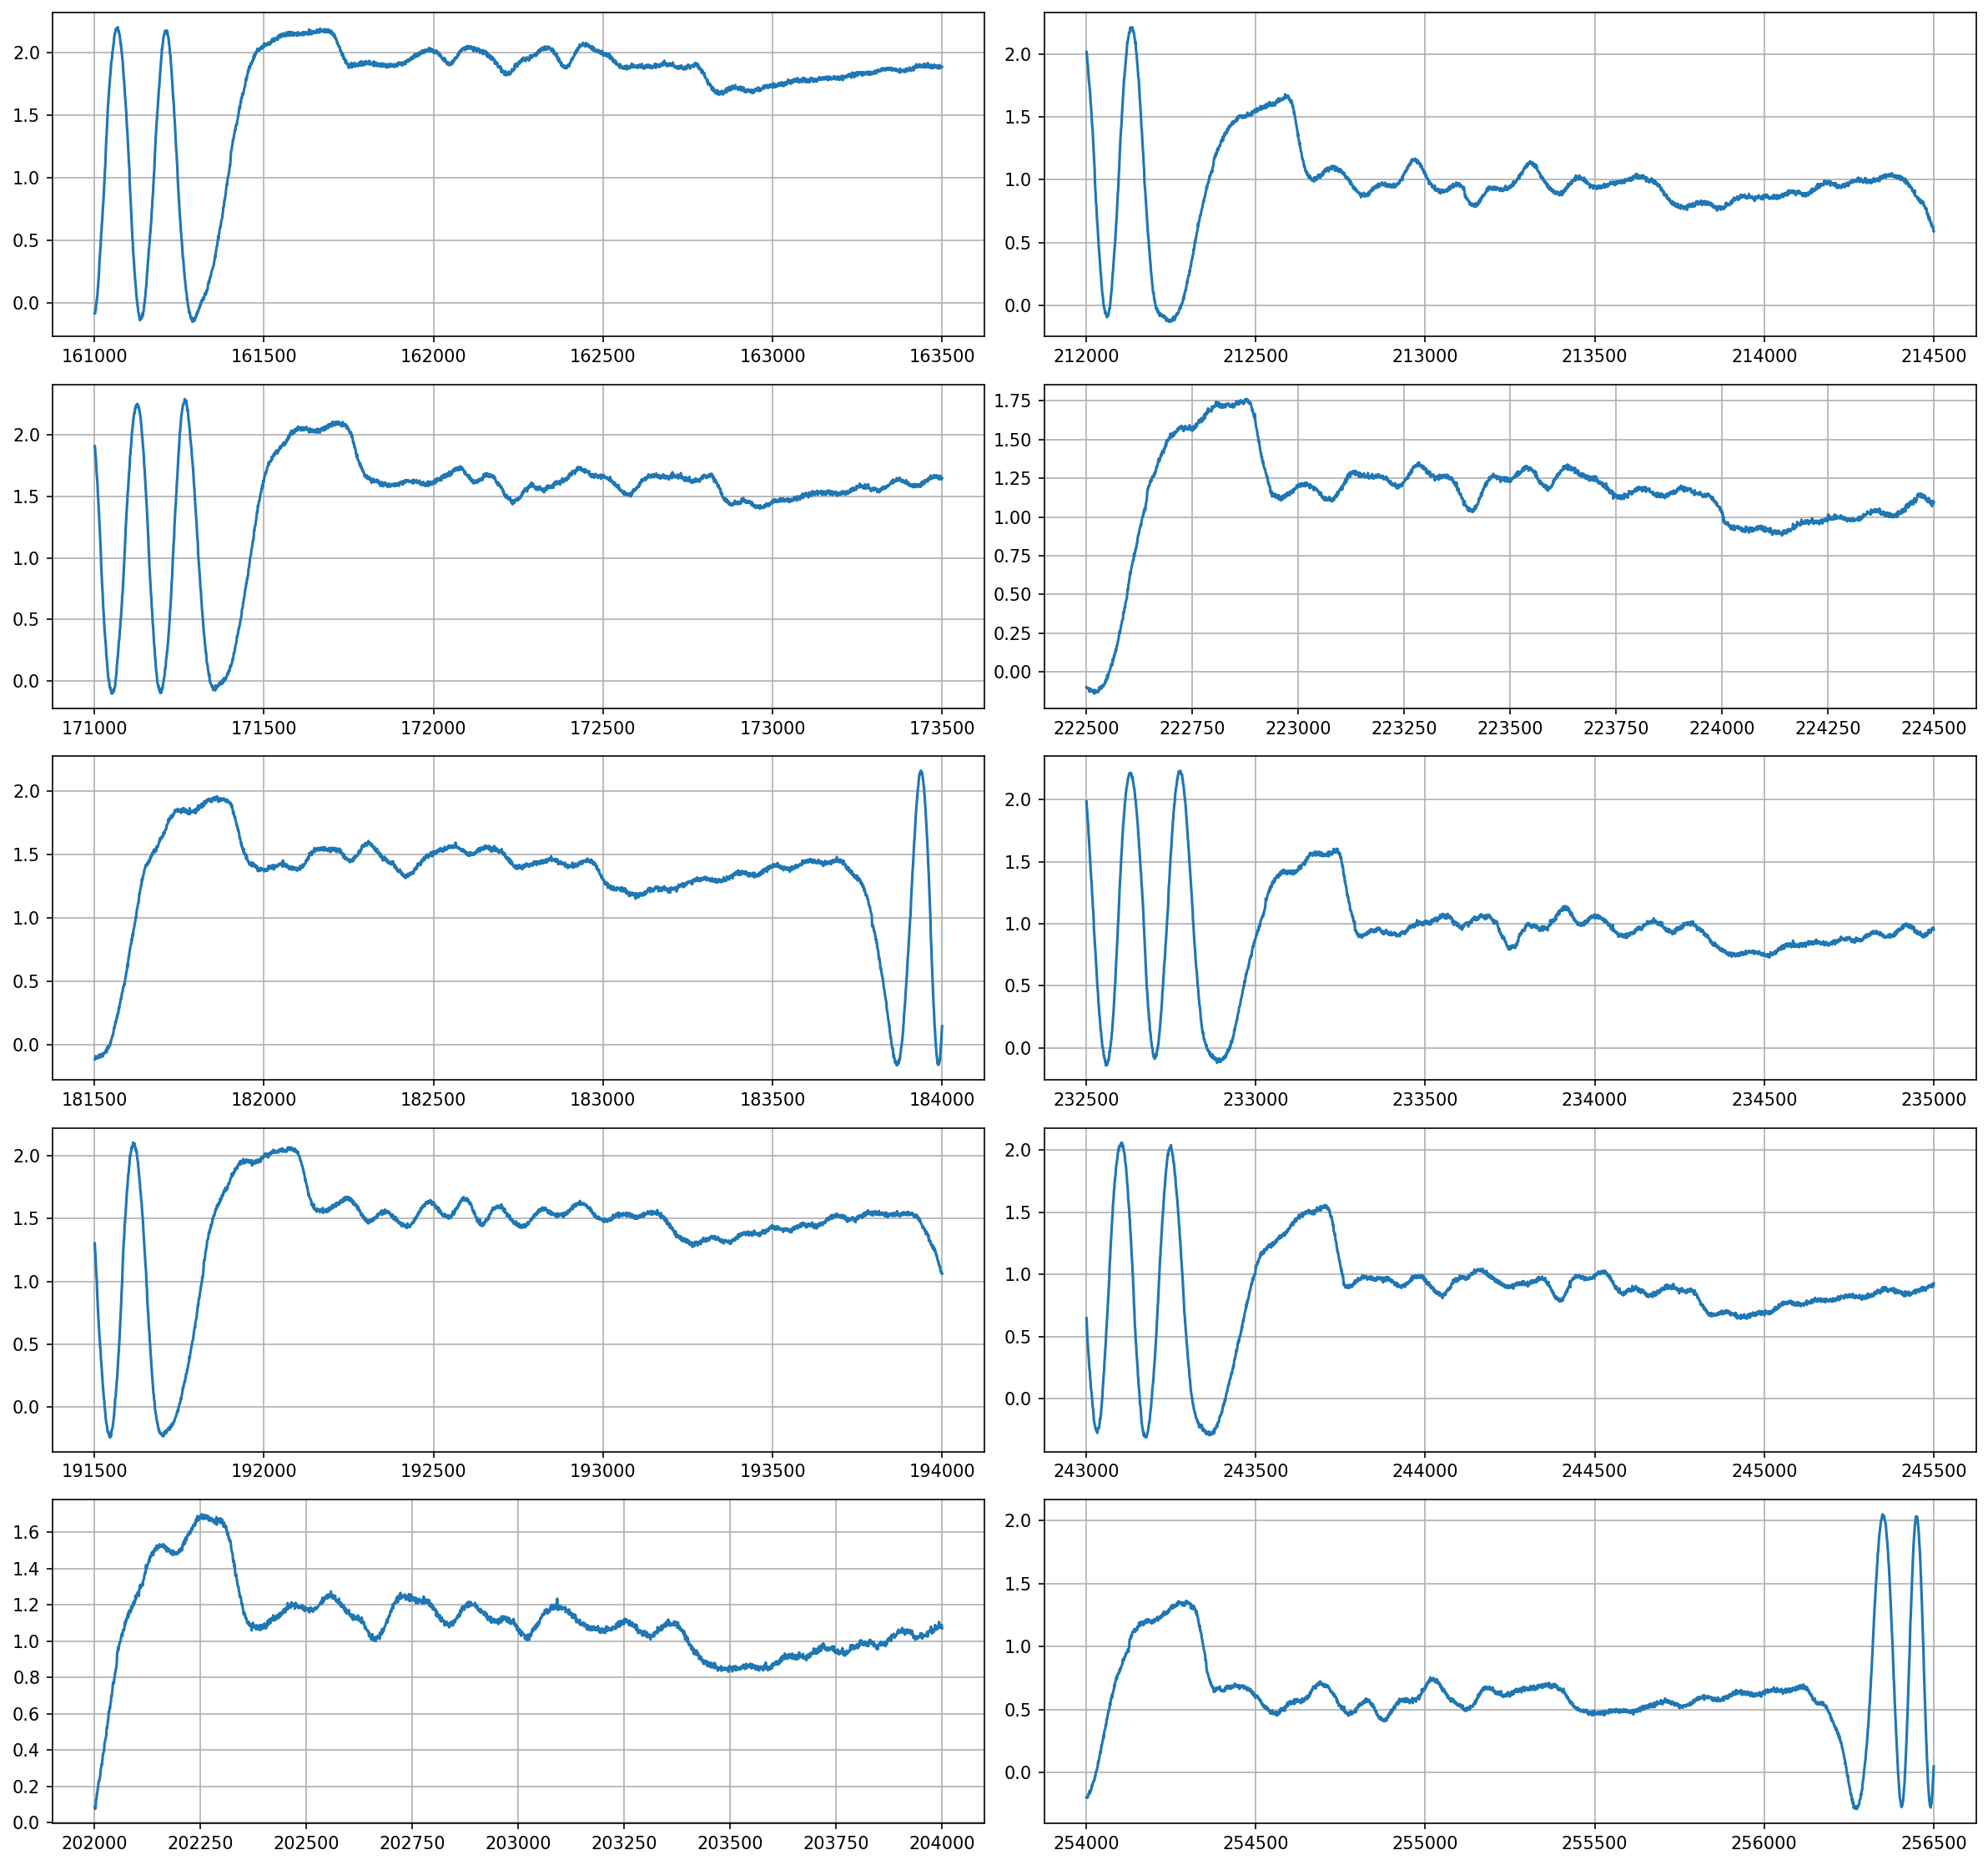

In [19]:
crop_results_end = pd.read_csv('start_results.csv', header=0)
test_samples_end = crop_results_end.iloc[16: 26][['1st bond start', '1st bond end']].astype(int)
df_pxd2 = pd.read_csv('CELL21_WBR431_1856K_BY_PXD2.csv', header=0)

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16, 15))
for i in range(5):
    ax[i, 0].plot(df_pxd2['Z'][test_samples_end.iloc[i]['1st bond start']: test_samples_end.iloc[i]['1st bond end']])
    ax[i, 1].plot(df_pxd2['Z'][test_samples_end.iloc[i+5]['1st bond start']: test_samples_end.iloc[i+5]['1st bond end']])

plt.tight_layout()
plt.show()

In [22]:
for i in range(10):
    print(np.mean(df_pxd2['Z'][test_samples_end.iloc[i]['1st bond start']: test_samples_end.iloc[i]['1st bond end']]))

1.7317580159999997
1.487597292
1.3312706
1.41856914
1.10569106
0.9612382519999999
1.1389533450000002
0.9541094080000001
0.859412632
0.6430307559999999
